<a href="https://colab.research.google.com/github/abacij/SES-Machine-Learning/blob/main/Copy_of_UPDATED_Critical_Environ_Task_RB_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-2-5bbda10473dc>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PE_low[t] = (r - np.sum(v[s==1]))
<ipython-input-2-5bbda10473dc>:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PE_high[t] = (r - np.sum(v[s==1]))


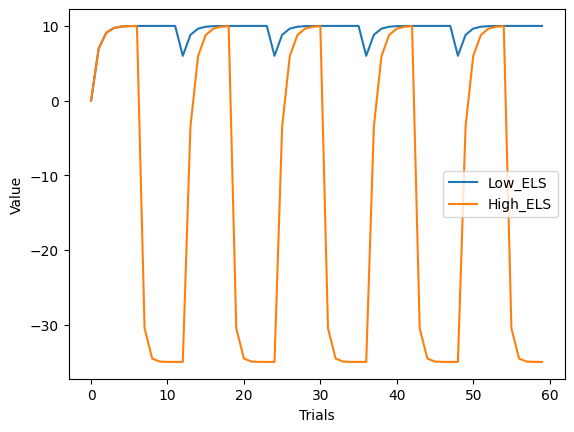

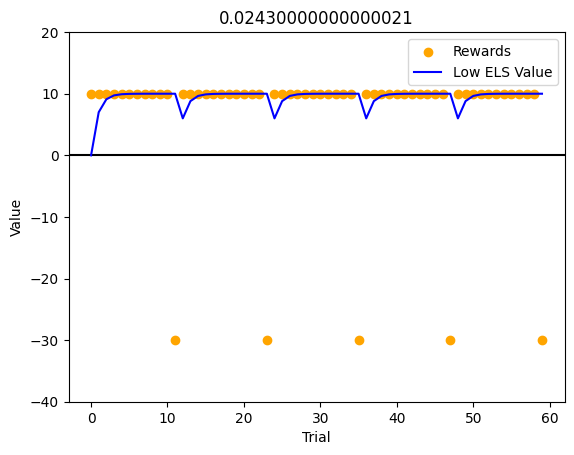

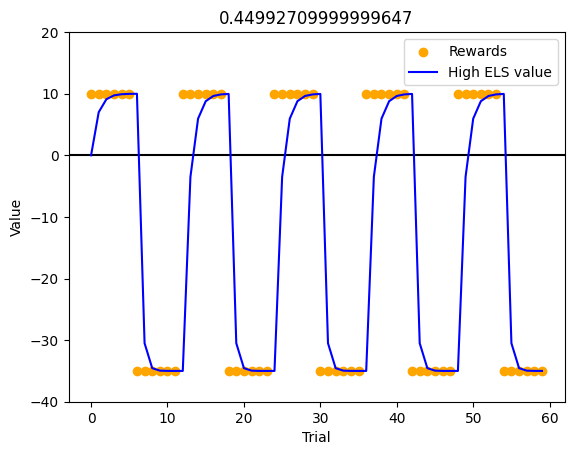

6.666666666666667
-12.5


In [ ]:
#Low ELS - Agent 1
nTrials = 60

S_low = np.ones([1,nTrials])
nStim_low = np.size(S_low,0) # Total number of CSs
V_low = np.zeros([nStim_low, nTrials])
V_low[0,0] = 0

# Define the pattern for each set of 4 trials
pattern = [1, 1, 1, 1, 1,1,1,1,1,1,1,-1] #...this is the patterns of gains and losses!
num_repeats = 5 #...repeat the pattern 5 times

# Create the vector with 100 trials
R = np.tile(pattern, num_repeats)

rewards = np.round(np.random.normal(10, 0, size=np.sum(R == 1)))
losses = np.round(np.random.normal(-30, 0, size=np.sum(R == -1)))

tmpR = R.copy()
R[tmpR==1] = rewards#...sample from the rewards
R[tmpR==-1] = losses#...sample from the losses

R_low = np.array([R])
PE_low = np.full([nTrials],np.nan) #From notion

eta_neg = 0.1
eta_pos = 0.7

for t in np.arange(nTrials-1):
  r = R_low[:,t] #This was changed
  s = S_low[:,t]
  v = V_low[:,t]
  #changing eta for wins and losses
  pe = (r - np.sum(v[s==1]))

  if r<0:
    delta = eta_neg * pe #I made losses have a greater learning rate
  elif r>0:
    delta = eta_pos *pe
  V_low[s==1,t+1] = V_low[s==1,t] + delta
  V_low[s==0,t+1] = V_low[s==0,t]

#Trying to plot prediction error here
  PE_low[t] = (r - np.sum(v[s==1]))
#scroll all the way to the bottom to see my attempts at plotting
sumPE_low = np.nansum(PE_low)
meanPE_low = np.nanmean(np.abs(PE_low))
medianPE_low = np.nanmedian(np.abs(PE_low))


#########################################################
#High ELS - Agent 2
nTrials = 60

S_high = np.ones([1,nTrials])
nStim_high = np.size(S_high,0) # Total number of CSs
V_high = np.zeros([nStim_high, nTrials])
V_high[0,0] = 0

# Define the pattern for each set of 4 trials
pattern = [1, 1, 1, 1,1,1,-1, -1,-1,-1,-1,-1]
num_repeats = 5

# Create the vector with 100 trials
R = np.tile(pattern, num_repeats)

rewards = np.round(np.random.normal(10, 0, size=np.sum(R == 1)))
losses = np.round(np.random.normal(-35, 0, size=np.sum(R == -1)))

tmpR = R.copy()
R[tmpR==1] = rewards#...sample from the rewards
R[tmpR==-1] = losses#...sample from the losses

R_high = np.array([R])
PE_high = np.full([nTrials],np.nan) #From notion

eta_neg = 0.9
eta_pos = 0.7

for t in np.arange(nTrials-1):
  r = R_high[:,t]
  s = S_high[:,t]
  v = V_high[:,t]
  # OLD - delta = eta * (r - np.sum(v[s==1]))
  #NEW
  pe = (r - np.sum(v[s==1]))


  if r<0:
    delta = eta_neg * pe #I made losses have a greater learning rate
  elif r>0:
    delta = eta_pos *pe
  V_high[s==1,t+1] = V_high[s==1,t] + delta
  V_high[s==0,t+1] = V_high[s==0,t]
  PE_high[t] = (r - np.sum(v[s==1]))

sumPE_high = np.nansum(PE_high)
meanPE_high = np.nanmean(np.abs(PE_high))
medianPE_high = np.nanmedian(np.abs(PE_high))

plt.plot(np.sum(V_low,0),label = 'Low_ELS')
plt.plot(np.sum(V_high,0),label = 'High_ELS')
plt.xlabel('Trials')
plt.ylabel('Value')
plt.legend()
plt.show()

yMin = -40
yMax = 20

plt.axhline(y=0, color='black')
#plt.scatter(np.arange(nTrials), R_high[0], label = 'Rewards', marker='o', color='blue')
#plt.plot(np.arange(nTrials), R_low[0], label = 'Rewards', color='blue')
plt.scatter(range(np.size(R_low,1)),np.transpose(R_low),label = 'Rewards',color='orange')
plt.plot(np.arange(nTrials),V_low[0,:], label = 'Low ELS Value', linestyle='-', color='blue')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.ylim(yMin, yMax)
plt.title(str(medianPE_low))
plt.legend()
plt.show()

plt.axhline(y=0, color='black')
#plt.scatter(np.arange(nTrials), R_high[0], label = 'Rewards', marker='o', color='blue')
#plt.plot(np.arange(nTrials), R_high[0], label = 'Rewards', color='orange')
plt.scatter(np.arange(nTrials), R_high[0], label = 'Rewards', color='orange')
plt.plot(np.arange(nTrials),V_high[0,:], label = 'High ELS value', linestyle='-', color='blue')
plt.xlabel('Trial')
plt.ylabel('Value')
plt.ylim(yMin, yMax)
plt.title(str(medianPE_high))
plt.legend()
plt.show()

print(np.mean(R_low))
print(np.mean(R_high))


In [ ]:
#Low low value environment

#sparse rewards with periods of big losses
posPerc = 0.5
noPos = int(np.round(nTrials*posPerc)) #...number of rewarding trials
posIndices = np.random.choice(nTrials,noPos,replace=False)

#Automated reward vector
mean = 5  # desired mean
std_dev = 2  # desired standard deviation
R_rew = np.round(np.random.normal(mean, std_dev, noPos))

R = np.zeros(int(np.round(nTrials*(1-posPerc))))
R = np.concatenate((R, R_rew))
np.random.shuffle(R)

# When there are losses they should be a few in a row
mean = -50  # desired mean
std_dev = 5  # desired standard deviation
R_loss = np.round(np.random.normal(mean, std_dev, size=200))
R_loss = np.array(R_loss)

randLoss = np.random.choice(nTrials-5,5,replace=False)

# Insert the numbers from the sample vector in sets of 3s at the selected positions
for i, position in enumerate(randLoss):
    R[position:position+3] = R_loss[i*3:i*3+3]

print(R)
print(np.mean(R))

#High value environment

#sparse rewards with periods of big losses
noPos = int(np.round(nTrials*0.4)) #...number of rewarding trials
posIndices = np.random.choice(nTrials,noPos,replace=False)

#Automated reward vector
mean = -5  # desired mean
std_dev = 2  # desired standard deviation
R_loss = np.round(np.random.normal(mean, std_dev, noPos))

R = np.zeros(int(np.round(nTrials*0.5)))
R = np.concatenate((R, R_loss))
np.random.shuffle(R)

# When there are gains they should be a few in a row
mean = 50  # desired mean
std_dev = 5  # desired standard deviation
R_rew = np.round(np.random.normal(mean, std_dev, size=100))
R_rew = np.array(R_rew)

randRew = np.random.choice(nTrials-5,5,replace=False)

# Insert the numbers from the sample vector in sets of 3s at the selected positions
for i, position in enumerate(randRew):
    i = i+1
    R[position:position+3] = R_rew[i*3:i*3+3]

print(R)
print(np.mean(R))

[  0.   0.   0.   0.   0.   0.   5.   5.   6.   0.   4.   5.   0.   5.
   7.   0. -54. -41. -51.   0.   0.   0. -44. -59. -55.   7.   5.   6.
   0.   7.   6.   0.   0.   0.   8.   6.   4.   6.   0.   0.   8.   3.
   0.   0. -57. -53. -43.   0.   2. -51. -38. -43.   5.   0.   2.   7.
   5.   6.   0.   0.   0.   0.   6.   8.   4.   0.   4.   7.   0.   5.
   4. -61. -50. -52.   0.   4.   8.   0.   0.   0.   0.   0.   0.   0.
   0.   6.   5.   4.   3.   6.   0.   0.   0.   0.   5.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   5.   2.   4.   6.   7.   4.]
-4.681818181818182
[  0.   0.   0.  -5.   0.  -5.   0.  -3.  -4.  -7.   0.  -7.  -5.  -4.
  -5.   0.   0.   0.  -5.   0.  -6.   0.  59.  53.  47.   0.  -6.   0.
   0.   0.  -5.   0.   0.  -7.   0.  47.  59.  54.  -7.   0.   0.   0.
   0.   0.   0.  -6.  -5.  -7.  -6.  -9.   0.   0. -10.  -1.   0.  -5.
  56.  41.  46.  -8.   0.  53.  53.  44.  -3.  -6.  -4.   0.  -5.  -6.
  -2.  -2.   0.   0.  -5.   0.   0.   0.   0.  -7.   0.  -5.  47.  

In [ ]:

# Original 100 element vector
original_vector = np.random.randint(1, 100, 100)

# Vector with numbers to be sampled and inserted in sets of 3s
sample_vector = np.arange(201, 201 + 3 * 5)
print(sample_vector)

# Select 5 random positions in the original vector
random_positions = np.random.choice(100, 5, replace=False)

# Insert the numbers from the sample vector in sets of 3s at the selected positions
for i, position in enumerate(random_positions):
    original_vector[position:position+3] = sample_vector[i*3:i*3+3]

print("Original Vector with Inserted Sets of 3s:")
print(original_vector)


[201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Original Vector with Inserted Sets of 3s:
[ 38  50  21  66  25  72  96  17  86  53  38  32  71 210 211 212  29   9
  71  35  20  19  84  14  28   3  26  89  77  16  25  60  51  15  82  57
  94  24  17  74  68  50  19  35  96  66  88  32  54  79  13  12  23 204
 205 206  62  11  32  28  73   1  67  62  14  87 201 202 203  82  77  80
  62  54  52  63  83  33  15 213 214 215   8  52  81  58   9  69 207 208
 209  77  87  67  19  32  31  27  22  48]


In [ ]:
np.size(R_loss)

10

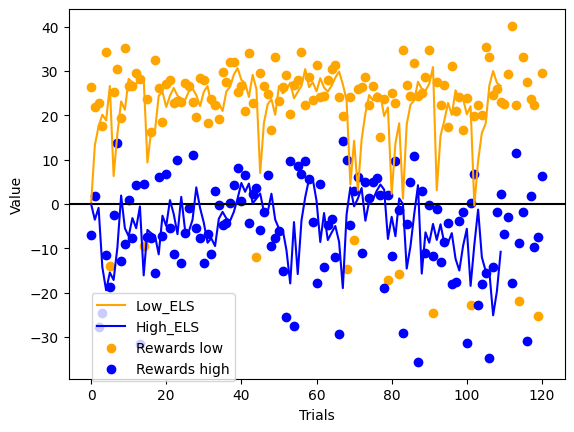

In [ ]:
plt.axhline(0, color='black')
plt.plot(np.sum(V_low,0),label = 'Low_ELS',color='orange')
plt.plot(np.sum(V_high,0),label = 'High_ELS',color='blue')
plt.scatter(range(np.size(R_low,1)),np.transpose(R_low),label = 'Rewards low',color='orange')
plt.scatter(range(np.size(R_high,1)),np.transpose(R_high),label = 'Rewards high',color='blue')
plt.xlabel('Trials')
plt.ylabel('Value')
# Customize the legend!
legend = plt.legend(loc='upper right')  # Set the initial position of the legend
legend.set_bbox_to_anchor((0.35, 0.25))  # Adjust the position of the legend relative to the plot
legend.get_frame().set_alpha(0.8)  # Set the transparency of the legend (0.0 is fully transparent, 1.0 is fully opaque)
# Show the plot
plt.show()

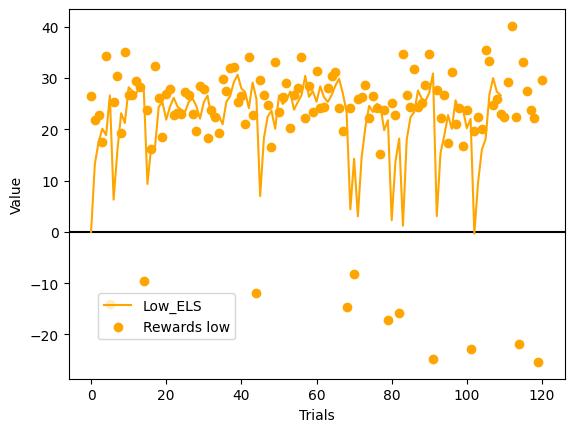

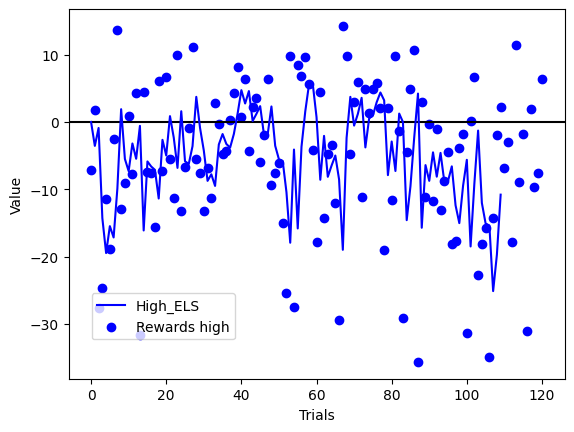

In [ ]:
plt.axhline(0, color='black')
plt.plot(np.sum(V_low,0),label = 'Low_ELS',color='orange')
#plt.plot(np.sum(V_high,0),label = 'High_ELS',color='blue')
plt.scatter(range(np.size(R_low,1)),np.transpose(R_low),label = 'Rewards low',color='orange')
#plt.scatter(range(np.size(R_high,1)),np.transpose(R_high),label = 'Rewards high',color='blue')
plt.xlabel('Trials')
plt.ylabel('Value')
# Customize the legend!
legend = plt.legend(loc='upper right')  # Set the initial position of the legend
legend.set_bbox_to_anchor((0.35, 0.25))  # Adjust the position of the legend relative to the plot
legend.get_frame().set_alpha(0.8)  # Set the transparency of the legend (0.0 is fully transparent, 1.0 is fully opaque)
# Show the plot
plt.show()

plt.axhline(0, color='black')
#plt.plot(np.sum(V_low,0),label = 'Low_ELS',color='orange')
plt.plot(np.sum(V_high,0),label = 'High_ELS',color='blue')
#plt.scatter(range(np.size(R_low,1)),np.transpose(R_low),label = 'Rewards low',color='orange')
plt.scatter(range(np.size(R_high,1)),np.transpose(R_high),label = 'Rewards high',color='blue')
plt.xlabel('Trials')
plt.ylabel('Value')
# Customize the legend!
legend = plt.legend(loc='upper right')  # Set the initial position of the legend
legend.set_bbox_to_anchor((0.35, 0.25))  # Adjust the position of the legend relative to the plot
legend.get_frame().set_alpha(0.8)  # Set the transparency of the legend (0.0 is fully transparent, 1.0 is fully opaque)
# Show the plot
plt.show()

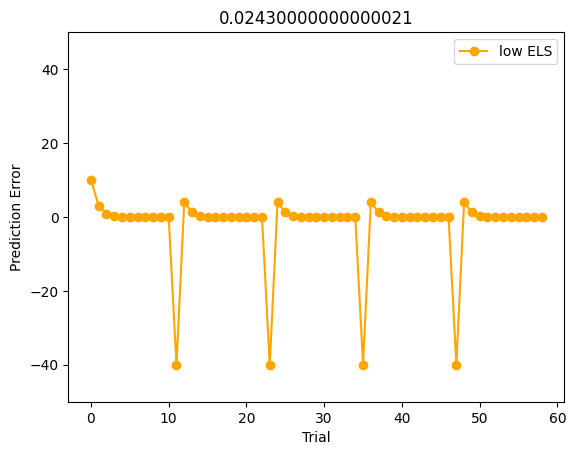

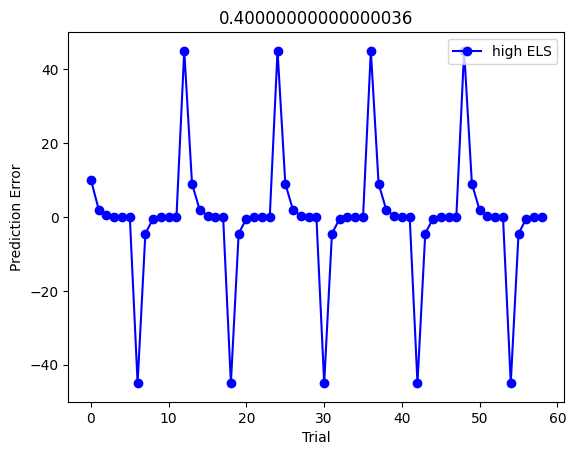

In [ ]:
yMin = -50
yMax = 50

#Since sending you the message in notion, I used ChatGPT for help here
plt.plot(np.arange(nTrials-1), PE_low[:-1], label = 'low ELS', marker='o', linestyle='-', color='orange')
plt.xlabel('Trial')
plt.ylabel('Prediction Error')
plt.ylim(yMin, yMax)
plt.title(str(medianPE_low))
plt.legend()
plt.show()

plt.plot(np.arange(nTrials-1), PE_high[:-1], label = 'high ELS', marker='o', linestyle='-', color='blue')
plt.xlabel('Trial')
plt.ylabel('Prediction Error')
plt.ylim(yMin, yMax)
plt.title(str(medianPE_high))
plt.legend()
plt.show()

# plt.plot(np.arange(nTrials-1), PE_test[:-1], label = 'high ELS', marker='o', linestyle='-', color='blue')
# plt.xlabel('Trial')
# plt.ylabel('Prediction Error')
# plt.ylim(yMin, yMax)
# plt.legend()
# plt.show()